In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

6


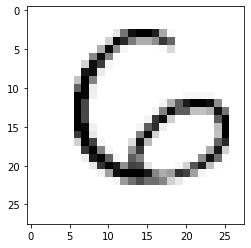

In [4]:
image_index = 2324
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [1]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

NameError: name 'x_train' is not defined

In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
batch_size = 128
num_classes = 10
epochs = 10

from keras.callbacks import Callback

class Histories(Callback):

    def on_train_begin(self,logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))


histories = Histories()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[histories]
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.2765 - accuracy: 0.9196 - val_loss: 0.1173 - val_accuracy: 0.9643
Epoch 2/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 3/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0696 - accuracy: 0.9791 - val_loss: 0.0560 - val_accuracy: 0.9827
Epoch 4/10
60000/60000 [==============================] - 31s 513us/step - loss: 0.0519 - accuracy: 0.9845 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 5/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 6/10
60000/60000 [==============================] - 32s 531us/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0498 - val_accuracy: 0.9834
Epoch 7/10
60000/60000 [==============================] 

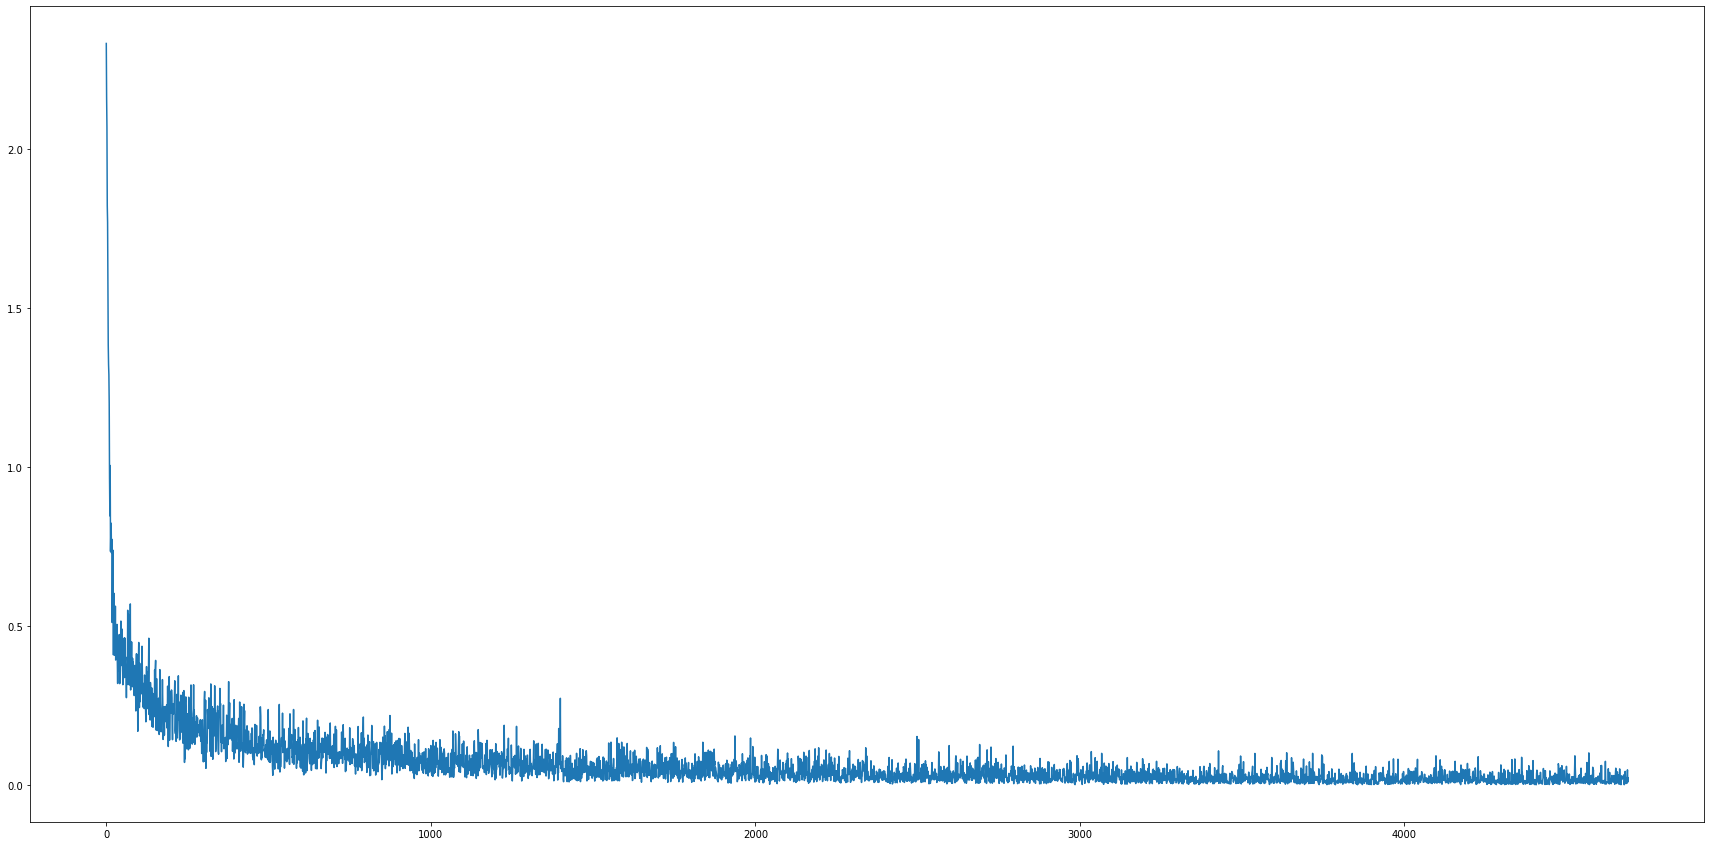

In [18]:
plt.plot(histories.losses[:])
plt.rcParams['figure.figsize'] = [30, 15]
plt.show()